# Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
# import cv2
import pandas as pd
import copy

# To make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# From previous labs

In [2]:
# From last lab get the correlation coefficient
# Load exam data
EXAM_PATH = os.path.join("data/")
EXAM_URL = "../Nick/data/StudentsPerformance.csv"

def load_exam_data(exam_path=EXAM_PATH):
    csv_path = os.path.join(exam_path, "StudentsPerformance.csv")
    return pd.read_csv(csv_path)

exam_data = load_exam_data()
exam_data_copy = copy.deepcopy(exam_data)


# # Changes gender to numerical values
# for item in exam_data["gender"]:
#     if item == "female":
#         exam_data["gender"].mask(exam_data["gender"] == "female", 0, inplace=True)
#     elif item == "male":
#         exam_data["gender"].mask(exam_data["gender"] == "male", 1, inplace=True)
    

# # Changes race/ethnicity to numerical values
# for item in exam_data["race/ethnicity"]:
#     if item == "group A":
#         exam_data["race/ethnicity"].mask(exam_data["race/ethnicity"] == "group A", 0, inplace=True)
#     elif item == "group B":
#         exam_data["race/ethnicity"].mask(exam_data["race/ethnicity"] == "group B", 0.25, inplace=True)
#     elif item == "group C":
#         exam_data["race/ethnicity"].mask(exam_data["race/ethnicity"] == "group C", 0.5, inplace=True)
#     elif item == "group D":
#         exam_data["race/ethnicity"].mask(exam_data["race/ethnicity"] == "group D", 0.75, inplace=True)
#     elif item == "group E":
#         exam_data["race/ethnicity"].mask(exam_data["race/ethnicity"] == "group E", 1, inplace=True)
# Changes parental level of education to numerical values
for item in exam_data["parental level of education"]:
    if item == "bachelor's degree":
        exam_data["parental level of education"].mask(exam_data["parental level of education"] == "bachelor's degree", 3, inplace=True)
    elif item == "some college":
        exam_data["parental level of education"].mask(exam_data["parental level of education"] == "some college", 1, inplace=True)
    elif item == "master's degree":
        exam_data["parental level of education"].mask(exam_data["parental level of education"] == "master's degree", 4, inplace=True)
    elif item == "associate's degree":
        exam_data["parental level of education"].mask(exam_data["parental level of education"] == "associate's degree", 2, inplace=True)
    elif item == "high school":
        exam_data["parental level of education"].mask(exam_data["parental level of education"] == "high school", 0, inplace=True)
    elif item == "some high school":
        exam_data["parental level of education"].mask(exam_data["parental level of education"] == "some high school", 0, inplace=True)

# # Changes lunch to numerical values
# for item in exam_data["lunch"]:
#     if item == "standard":
#         exam_data["lunch"].mask(exam_data["lunch"] == "standard", 0, inplace=True)
#     elif item == "free/reduced":
#         exam_data["lunch"].mask(exam_data["lunch"] == "free/reduced", 1, inplace=True)

# # Changes test preparation course to numerical values
for item in exam_data["test preparation course"]:
    if item == "none":
        exam_data["test preparation course"].mask(exam_data["test preparation course"] == "none", 0, inplace=True)
    elif item == "completed":
        exam_data["test preparation course"].mask(exam_data["test preparation course"] == "completed", 1, inplace=True)

exam_data

# exam_data["gender"] = exam_data["gender"].astype("int")
# exam_data["race/ethnicity"] = exam_data["race/ethnicity"].astype("int")
# exam_data["parental level of education"] = exam_data["parental level of education"].astype("int")
# exam_data["lunch"] = exam_data["lunch"].astype("int")
# exam_data["test preparation course"] = exam_data["test preparation course"].astype("int")








,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,3,standard,0,72,72,74
1,female,group C,1,standard,1,69,90,88
2,female,group B,4,standard,0,90,95,93
3,male,group A,2,free/reduced,0,47,57,44
4,male,group C,1,standard,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,4,standard,1,88,99,95
996,male,group C,0,free/reduced,0,62,55,55
997,female,group C,0,free/reduced,1,59,71,65
998,female,group D,1,standard,1,68,78,77


# Changes From Previous Labs - OneHot Encoding
Changes string values that have been converted to numerical values from a numbered system (1, 2, 3, etc) to be a system in which everything is 0 except for the thing we are looking for.
Example: Gender is Male and Female
 - Create 2 columns called Male and Female
 - If the person is Male then the Female column will be set to 0 and Male is set to 1 etc

In [3]:
# Implements onehot encoding to the data that has been changed to numerical values

from sklearn.preprocessing import OneHotEncoder
exam_data_encoder = OneHotEncoder()

exam_gender = exam_data[["gender"]]
# exam_gender
exam_1hot_gender = exam_data_encoder.fit_transform(exam_gender)

exam_1hot_gender.toarray()

# Create new column to record genders in one hot encoder format
# Insert male and female columns and set every value to 0
exam_data.insert(1, "Female", 0)
exam_data.insert(2, "Male", 0)
index = 0
for item in exam_1hot_gender.toarray():
    if (item[0] == 1.0):
        # if the first entry is 1 then gender is female
        exam_data.at[index, "Female"] = 1

    if (item[1] == 1.0):
        exam_data.at[index, "Male"] = 1
    index += 1


# Finished implementing onehot encoding so we can drop our gender column
exam_data = exam_data.drop(columns="gender")
exam_data



,Female,Male,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,group B,3,standard,0,72,72,74
1,1,0,group C,1,standard,1,69,90,88
2,1,0,group B,4,standard,0,90,95,93
3,0,1,group A,2,free/reduced,0,47,57,44
4,0,1,group C,1,standard,0,76,78,75
...,...,...,...,...,...,...,...,...,...
995,1,0,group E,4,standard,1,88,99,95
996,0,1,group C,0,free/reduced,0,62,55,55
997,1,0,group C,0,free/reduced,1,59,71,65
998,1,0,group D,1,standard,1,68,78,77


In [4]:
# Race/Ethnicity onehot encoding

exam_race_eth = exam_data[["race/ethnicity"]]

exam_1hot_race_eth = exam_data_encoder.fit_transform(exam_race_eth)

exam_data.insert(3, "Group A", 0)
exam_data.insert(4, "Group B", 0)
exam_data.insert(5, "Group C", 0)
exam_data.insert(6, "Group D", 0)
exam_data.insert(7, "Group E", 0)
index = 0

exam_1hot_race_eth.toarray()

for item in exam_1hot_race_eth.toarray():
    if (item[0] == 1.0):
        # Group A
        exam_data.at[index, "Group A"] = 1
    elif (item[1] == 1.0):
        # Group B
        exam_data.at[index, "Group B"] = 1
    elif (item[2] == 1.0):
        # Group C
        exam_data.at[index, "Group C"] = 1
    elif (item[3] == 1.0):
        # Group D
        exam_data.at[index, "Group D"] = 1
    elif (item[4] == 1.0):
        # Group E
        exam_data.at[index, "Group E"] = 1
    index += 1

# Drop race/ethnicity
exam_data = exam_data.drop(columns="race/ethnicity")

exam_data



,Female,Male,Group A,Group B,Group C,Group D,Group E,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,0,1,0,0,0,3,standard,0,72,72,74
1,1,0,0,0,1,0,0,1,standard,1,69,90,88
2,1,0,0,1,0,0,0,4,standard,0,90,95,93
3,0,1,1,0,0,0,0,2,free/reduced,0,47,57,44
4,0,1,0,0,1,0,0,1,standard,0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,4,standard,1,88,99,95
996,0,1,0,0,1,0,0,0,free/reduced,0,62,55,55
997,1,0,0,0,1,0,0,0,free/reduced,1,59,71,65
998,1,0,0,0,0,1,0,1,standard,1,68,78,77


In [5]:
# Lunch
exam_lunch = exam_data[["lunch"]]

exam_1hot_lunch = exam_data_encoder.fit_transform(exam_lunch)

# Inserting new columns and setting to 0
exam_data.insert(9, "Standard", 0)
exam_data.insert(10, "Free/Reduced", 0)

exam_1hot_lunch.toarray()[:15]
index = 0
for item in exam_1hot_lunch.toarray():
    if (item[0] == 1.0):
        # Free/Reduced
        exam_data.at[index, "Free/Reduced"] = 1
    
    if (item[1] == 1.0):
        # Standard
        exam_data.at[index, "Standard"] = 1
    index += 1


exam_data = exam_data.drop(columns="lunch")
exam_data



,Female,Male,Group A,Group B,Group C,Group D,Group E,parental level of education,Standard,Free/Reduced,test preparation course,math score,reading score,writing score
0,1,0,0,1,0,0,0,3,1,0,0,72,72,74
1,1,0,0,0,1,0,0,1,1,0,1,69,90,88
2,1,0,0,1,0,0,0,4,1,0,0,90,95,93
3,0,1,1,0,0,0,0,2,0,1,0,47,57,44
4,0,1,0,0,1,0,0,1,1,0,0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,4,1,0,1,88,99,95
996,0,1,0,0,1,0,0,0,0,1,0,62,55,55
997,1,0,0,0,1,0,0,0,0,1,1,59,71,65
998,1,0,0,0,0,1,0,1,1,0,1,68,78,77


In [6]:
# Selecting features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = exam_data.iloc[:,0:14]
x = x.drop(columns=["math score"]) # Drops maths column (target col)
y = exam_data.iloc[:,-3]
# print(x)

# Getting the top 6 best features and putting them into a new dataFrame
best_features = SelectKBest(score_func=chi2, k=6)
fit = best_features.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcols = pd.DataFrame(x.columns)
features_scores = pd.concat([dfcols, dfscores], axis=1)
features_scores.columns = ["features", "score"]
# print(features_scores.nlargest(6, "score"))

# Top 2
top_two = exam_data[["writing score", "reading score"]]
# Top 4
top_four = exam_data[["writing score", "reading score", "parental level of education", "Free/Reduced"]]
# Top 6
top_six = exam_data[["writing score", "reading score", "parental level of education", "Free/Reduced", "Group E", "Group B"]]

# Adding top features to different arrays so we can use operations on them
data_sets = [top_two, top_four, top_six, exam_data]
set_names = ["top_two", "top_four", "top_six", "exam_data"]
target = exam_data["math score"]

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

count = 0
for x in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)
    lin_reg = LinearRegression().fit(x_train, y_train) # Linear regression classifier and adding the train data to the model
    y_pred = lin_reg.predict(x_test) # Predictions being made on math score
    #print("Test predictions for {}: {}".format(set_names[count], y_pred)) # Print out the predictions
    count += 1


In [7]:
exam_data.corr()

C:\Users\nickm\AppData\Local\Temp\ipykernel_16072\3227287187.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  exam_data.corr()


,Female,Male,Group A,Group B,Group C,Group D,Group E,Standard,Free/Reduced,math score,reading score,writing score
Female,1.000000,-1.000000,-0.071001,0.028466,0.063368,-0.030566,-0.020302,-0.021372,0.021372,-0.167982,0.244313,0.301225
Male,-1.000000,1.000000,0.071001,-0.028466,-0.063368,0.030566,0.020302,0.021372,-0.021372,0.167982,-0.244313,-0.301225
Group A,-0.071001,0.071001,1.000000,-0.151381,-0.213923,-0.186234,-0.126110,-0.032329,0.032329,-0.091977,-0.096274,-0.110714
Group B,0.028466,-0.028466,-0.151381,1.000000,-0.331479,-0.288574,-0.195411,-0.008257,0.008257,-0.084250,-0.060283,-0.078254
Group C,0.063368,-0.063368,-0.213923,-0.331479,1.000000,-0.407797,-0.276145,-0.003385,0.003385,-0.073387,-0.003074,-0.010203
Group D,-0.030566,0.030566,-0.186234,-0.288574,-0.407797,1.000000,-0.240402,-0.009458,0.009458,0.050071,0.035177,0.082032
Group E,-0.020302,0.020302,-0.126110,-0.195411,-0.276145,-0.240402,1.000000,0.052398,-0.052398,0.205855,0.106712,0.089077
Standard,-0.021372,0.021372,-0.032329,-0.008257,-0.003385,-0.009458,0.052398,1.000000,-1.000000,0.350877,0.229560,0.245769
Free/Reduced,0.021372,-0.021372,0.032329,0.008257,0.003385,0.009458,-0.052398,-1.000000,1.000000,-0.350877,-0.229560,-0.245769
math score,-0.167982,0.167982,-0.091977,-0.084250,-0.073387,0.050071,0.205855,0.350877,-0.350877,1.000000,0.817580,0.802642


# Lab 4 - Classifier Testing and Evaluation

In [8]:
# # Stuff from previous labs
for x in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.2)

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    # lr.score(x_test, y_test)
    display(lr.score(x_test, y_test))


0.6825697127424625

0.6651892915946866

0.7374738149949711

1.0

<AxesSubplot: >

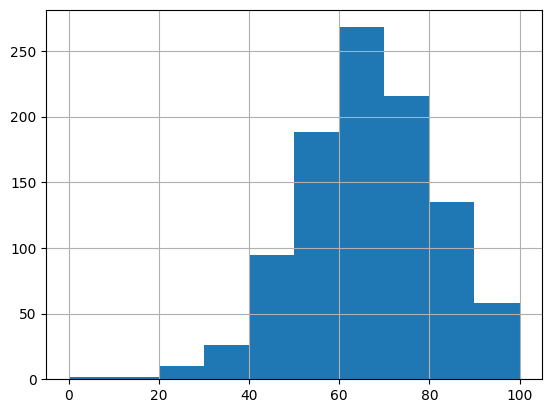

In [9]:
# Distribution
exam_data_copy["math score"].hist()

## Discretising

In [10]:
# Discretize the data back into string format
display("Before discretization", exam_data_copy)
def binFunction(row):
    if row["math score"] >= 70:
        return "A"
    elif row["math score"] >= 60:
        return "B"
    elif row["math score"] >= 50:
        return "C"
    elif row["math score"] >= 40:
        return "D"
    else:
        return "FAIL"


# score_labels = ["F", "D", "C", "B", "A"]

# exam_data_copy["math score"] = pd.cut(exam_data_copy["math score"], bins = 5, labels= score_labels)

# exam_data_copy["math score"].value_counts()

# exam_data_copy["math score"].hist()

exam_data_copy["math score"] = exam_data_copy.apply(binFunction, axis=1)

exam_data_copy.head()






'Before discretization'

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,A,72,74
1,female,group C,some college,standard,completed,B,90,88
2,female,group B,master's degree,standard,none,A,95,93
3,male,group A,associate's degree,free/reduced,none,D,57,44
4,male,group C,some college,standard,none,A,78,75


,Female,Male,Group A,Group B,Group C,Group D,Group E,parental level of education,Standard,Free/Reduced,test preparation course,math score,reading score,writing score
0,1,0,0,1,0,0,0,3,1,0,0,A,72,74
1,1,0,0,0,1,0,0,1,1,0,1,B,90,88
2,1,0,0,1,0,0,0,4,1,0,0,A,95,93
3,0,1,1,0,0,0,0,2,0,1,0,D,57,44
4,0,1,0,0,1,0,0,1,1,0,0,A,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,4,1,0,1,A,99,95
996,0,1,0,0,1,0,0,0,0,1,0,B,55,55
997,1,0,0,0,1,0,0,0,0,1,1,C,71,65
998,1,0,0,0,0,1,0,1,1,0,1,B,78,77


0      A
1      B
2      A
3      D
4      A
      ..
995    A
996    B
997    C
998    B
999    A
Name: math score, Length: 1000, dtype: object

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Set top_two
Accuracy: 0.504 - Precision: 0.504

True Positive Rate: 0.504
False Positive Rate: 0.496
F Measure: 0.504

Test Set top_four
Accuracy: 0.412 - Precision: 0.412

True Positive Rate: 0.412
False Positive Rate: 0.588
F Measure: 0.412



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Test Set top_six
Accuracy: 0.408 - Precision: 0.408

True Positive Rate: 0.408
False Positive Rate: 0.592
F Measure: 0.408

Test Set exam_data
Accuracy: 0.524 - Precision: 0.524

True Positive Rate: 0.524
False Positive Rate: 0.476
F Measure: 0.524



c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


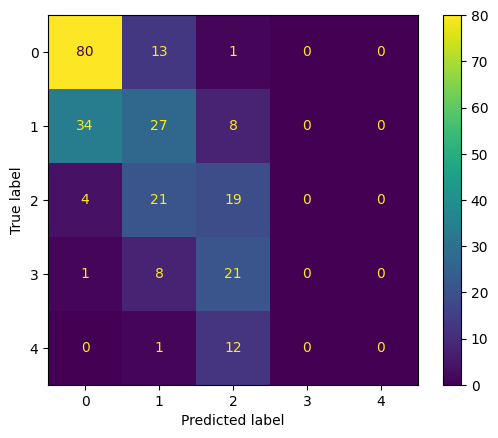

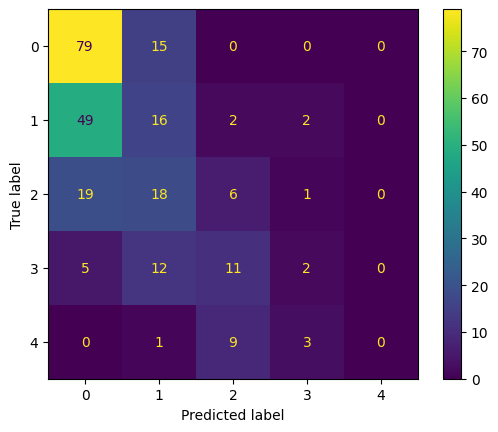

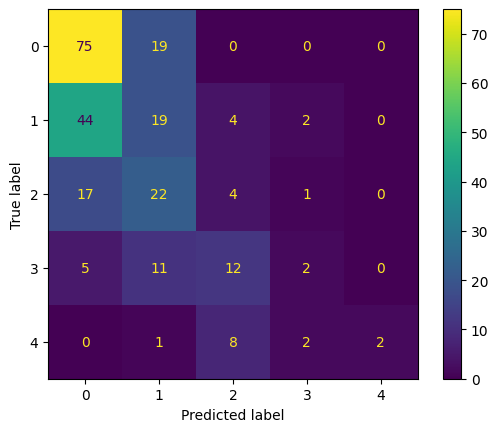

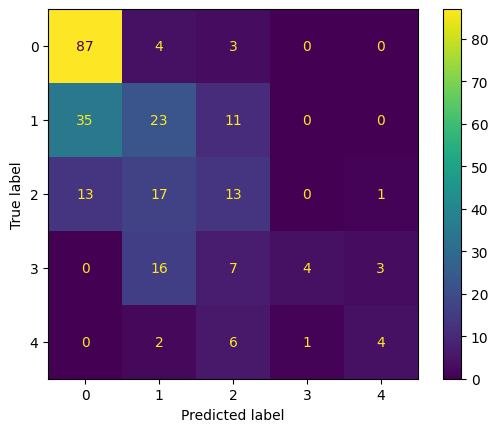

In [50]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score

exam_data_grade = copy.deepcopy(exam_data)

exam_data_grade["math score"] = exam_data_grade.apply(binFunction, axis=1)



data_sets_grade = [top_two, top_four, top_six, exam_data_grade]
target_for_copy = exam_data_grade["math score"]

display(exam_data_grade, target_for_copy)


y_train_A = (y_train == "A")
y_test_A = (y_test == "A")
# display(exam_data)
# some_grade = exam_data[0]


 
score_labels = ["A", "B", "C", "D", "FAIL"]
i = 0
for x in data_sets:
    x_train, x_test, y_train, y_test = train_test_split(x, target_for_copy, random_state=42)

    # K nearest neighbor stuff
    # knn = KNeighborsClassifier(n_neighbors=10)
    # knn.fit(x_train, y_train)
    # y_pred = knn.predict(x_test)
    # Linear regression stuff
    # lr = LinearRegression()
    # lr.fit(x_train, y_train)
    # y_pred = lr.predict(x_test)

    # SGD Classifier
    # sgd = SGDClassifier(random_state=42)
    # sgd.fit(x_train, y_train_A)
    # sgd.predict(some_grade)
    
    # # Random Forest Classifier
    # forest = RandomForestClassifier()
    # forest.fit(x_train, y_train)
    # y_pred = forest.predict(x_test)

    # Logistic Regression
    logR = LogisticRegression()
    logR.fit(x_train, y_train)
    y_pred=logR.predict(x_test)

    # Confusion matrix and display
    cm = confusion_matrix(y_test, y_pred, labels=score_labels)
    

    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_display.plot()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="micro")


    true_pos = (np.diag(cm)).sum()
    false_pos = (cm.sum(axis=0) - np.diag(cm)).sum()
    false_neg = (cm.sum(axis=1) - np.diag(cm)).sum()
    true_neg = (cm.sum() - (false_pos + false_neg + true_pos)).sum()

    true_pos_rate = true_pos / (true_pos + false_neg)
    false_pos_rate = false_pos / (true_pos + false_neg)
    # (2 * recall * precision) / (recall + precision)  - This is the f measure which measures recall and precision at the same time
    f_measure = (2 * true_pos_rate * precision) / (true_pos_rate + precision)

    print("Test Set {}".format(set_names[i]))
    print("Accuracy: {} - Precision: {}".format(accuracy, precision))
    print("")
    # positives and negative
    print("True Positive Rate: {}".format(true_pos_rate))
    print("False Positive Rate: {}".format(false_pos_rate))
    # F Measure
    print("F Measure: {}".format(f_measure))
    # 
    print("")
    i += 1



